In [25]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import pandas as pd
from images_segmentation import otsu as ot


Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [26]:
# Preprocessing - Histogram stretching

def stretch(x):
    intensities = []
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(img, (2, 100 - 2))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
    img_max = max(intensities)
    img_min = min(intensities)
    for j in np.ndindex(img.shape):
        img[j]= (img[j]-img_min)*(256 /(img_max-img_min))
    return img 

In [27]:
def b_dice(x): # POSITIVE PIXELS = BACKGROUND x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #gt picture x
    pt = thresholded[x] #post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]==0:
            if pt[x,y]==0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1
            else:
                tn+=1 #not really needed, but does not influence the runtime
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc
    print(b_dsc)

def f_dice(x): # POSITIVE PIXELS = FOREGROUND
    gt = ground_truth[x] 
    pt = thresholded[x] 
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1
            else:
                tn+=1 
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc
    print(f_dsc)
    


In [28]:
def dice(x):
    dice = min(f_dice(x),b_dice(x))
    return dice

In [29]:
# Load raw images from N2DH-GOWT1-dataset

img_N2DH_GOWT1_1 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t01.tif")
img_N2DH_GOWT1_2 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t21.tif")
img_N2DH_GOWT1_3 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t31.tif")
img_N2DH_GOWT1_4 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t39.tif")
img_N2DH_GOWT1_5 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t52.tif")
img_N2DH_GOWT1_6 = imread(r"data/Otsu_data/N2DH-GOWT1/img/t72.tif")


# Load ground truth images from N2DH-GOWT1-dataset

gt_N2DH_GOWT1_1 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg01.tif")
gt_N2DH_GOWT1_2 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg21.tif")
gt_N2DH_GOWT1_3 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg31.tif")
gt_N2DH_GOWT1_4 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg39.tif")
gt_N2DH_GOWT1_5 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg52.tif")
gt_N2DH_GOWT1_6 = imread(r"data/Otsu_data/N2DH-GOWT1/gt/man_seg72.tif")


In [30]:
# Load raw images from N2DL-HeLa-dataset

img_N2DL_HeLa_1 = imread(r"data/Otsu_data/N2DL-HeLa/img/t13.tif")
img_N2DL_HeLa_2 = imread(r"data/Otsu_data/N2DL-HeLa/img/t52.tif")
img_N2DL_HeLa_3 = imread(r"data/Otsu_data/N2DL-HeLa/img/t75.tif")
img_N2DL_HeLa_4 = imread(r"data/Otsu_data/N2DL-HeLa/img/t79.tif")


# Load ground truth images from N2Dl-HeLa-dataset

gt_N2DL_HeLa_1 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg13.tif")
gt_N2DL_HeLa_2 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg52.tif")
gt_N2DL_HeLa_3 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg75.tif")
gt_N2DL_HeLa_4 = imread(r"data/Otsu_data/N2DL-HeLa/gt/man_seg79.tif")

In [31]:
# Load raw images of NIH3T3-dataset

img_NIH3T3_1 = imread(r"data/Otsu_data/NIH3T3/img/dna-0.png")
img_NIH3T3_2 = imread(r"data/Otsu_data/NIH3T3/img/dna-1.png")
img_NIH3T3_3 = imread(r"data/Otsu_data/NIH3T3/img/dna-26.png")
img_NIH3T3_4 = imread(r"data/Otsu_data/NIH3T3/img/dna-27.png")
img_NIH3T3_5 = imread(r"data/Otsu_data/NIH3T3/img/dna-28.png")
img_NIH3T3_6 = imread(r"data/Otsu_data/NIH3T3/img/dna-29.png")
img_NIH3T3_7 = imread(r"data/Otsu_data/NIH3T3/img/dna-30.png")
img_NIH3T3_8 = imread(r"data/Otsu_data/NIH3T3/img/dna-31.png")
img_NIH3T3_9 = imread(r"data/Otsu_data/NIH3T3/img/dna-32.png")
img_NIH3T3_10 = imread(r"data/Otsu_data/NIH3T3/img/dna-33.png")
img_NIH3T3_11 = imread(r"data/Otsu_data/NIH3T3/img/dna-37.png")
img_NIH3T3_12 = imread(r"data/Otsu_data/NIH3T3/img/dna-40.png")
img_NIH3T3_13 = imread(r"data/Otsu_data/NIH3T3/img/dna-42.png")
img_NIH3T3_14 = imread(r"data/Otsu_data/NIH3T3/img/dna-44.png")
img_NIH3T3_15 = imread(r"data/Otsu_data/NIH3T3/img/dna-45.png")
img_NIH3T3_16 = imread(r"data/Otsu_data/NIH3T3/img/dna-46.png")
img_NIH3T3_17 = imread(r"data/Otsu_data/NIH3T3/img/dna-47.png")
img_NIH3T3_18 = imread(r"data/Otsu_data/NIH3T3/img/dna-49.png")


# Load ground truth images of NIH3T3-dataset
 
gt_NIH3T3_1 = imread(r"data/Otsu_data/NIH3T3/gt/0.png")
gt_NIH3T3_2 = imread(r"data/Otsu_data/NIH3T3/gt/1.png")
gt_NIH3T3_3 = imread(r"data/Otsu_data/NIH3T3/gt/26.png")
gt_NIH3T3_4 = imread(r"data/Otsu_data/NIH3T3/gt/27.png")
gt_NIH3T3_5 = imread(r"data/Otsu_data/NIH3T3/gt/28.png")
gt_NIH3T3_6 = imread(r"data/Otsu_data/NIH3T3/gt/29.png")
gt_NIH3T3_7 = imread(r"data/Otsu_data/NIH3T3/gt/30.png")
gt_NIH3T3_8 = imread(r"data/Otsu_data/NIH3T3/gt/31.png")
gt_NIH3T3_9 = imread(r"data/Otsu_data/NIH3T3/gt/32.png")
gt_NIH3T3_10 = imread(r"data/Otsu_data/NIH3T3/gt/33.png")
gt_NIH3T3_11 = imread(r"data/Otsu_data/NIH3T3/gt/37.png")
gt_NIH3T3_12 = imread(r"data/Otsu_data/NIH3T3/gt/40.png")
gt_NIH3T3_13 = imread(r"data/Otsu_data/NIH3T3/gt/42.png")
gt_NIH3T3_14 = imread(r"data/Otsu_data/NIH3T3/gt/44.png")
gt_NIH3T3_15 = imread(r"data/Otsu_data/NIH3T3/gt/45.png")
gt_NIH3T3_16 = imread(r"data/Otsu_data/NIH3T3/gt/46.png")
gt_NIH3T3_17 = imread(r"data/Otsu_data/NIH3T3/gt/47.png")
gt_NIH3T3_18 = imread(r"data/Otsu_data/NIH3T3/gt/49.png")

In [32]:
# Make a copy of all images of each dataset / use as "no preprocessed images"

copy_img_N2DH_GOWT1_1 = img_N2DH_GOWT1_1.copy()
copy_img_N2DH_GOWT1_2 = img_N2DH_GOWT1_2.copy()
copy_img_N2DH_GOWT1_3 = img_N2DH_GOWT1_3.copy()
copy_img_N2DH_GOWT1_4 = img_N2DH_GOWT1_4.copy()
copy_img_N2DH_GOWT1_5 = img_N2DH_GOWT1_5.copy()
copy_img_N2DH_GOWT1_6 = img_N2DH_GOWT1_6.copy()


copy_img_N2DL_HeLa_1 = img_N2DL_HeLa_1.copy()
copy_img_N2DL_HeLa_2 = img_N2DL_HeLa_2.copy()
copy_img_N2DL_HeLa_3 = img_N2DL_HeLa_3.copy()
copy_img_N2DL_HeLa_4 = img_N2DL_HeLa_4.copy()


copy_img_NIH3T3_1 = img_NIH3T3_1.copy()
copy_img_NIH3T3_2 = img_NIH3T3_2.copy()
copy_img_NIH3T3_3 = img_NIH3T3_3.copy()
copy_img_NIH3T3_4 = img_NIH3T3_4.copy()
copy_img_NIH3T3_5 = img_NIH3T3_5.copy()
copy_img_NIH3T3_6 = img_NIH3T3_6.copy()
copy_img_NIH3T3_7 = img_NIH3T3_7.copy()
copy_img_NIH3T3_8 = img_NIH3T3_8.copy()
copy_img_NIH3T3_9 = img_NIH3T3_9.copy()
copy_img_NIH3T3_10 = img_NIH3T3_10.copy()
copy_img_NIH3T3_11 = img_NIH3T3_11.copy()
copy_img_NIH3T3_12 = img_NIH3T3_12.copy()
copy_img_NIH3T3_13 = img_NIH3T3_13.copy()
copy_img_NIH3T3_14 = img_NIH3T3_14.copy()
copy_img_NIH3T3_15 = img_NIH3T3_15.copy()
copy_img_NIH3T3_16 = img_NIH3T3_16.copy()
copy_img_NIH3T3_17 = img_NIH3T3_17.copy()
copy_img_NIH3T3_18 = img_NIH3T3_18.copy()

In [33]:
# Apply median filter to all images of each dataset

median_img_N2DH_GOWT1_1 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_1, 5)
median_img_N2DH_GOWT1_2 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_2, 5)
median_img_N2DH_GOWT1_3 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_3, 5)
median_img_N2DH_GOWT1_4 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_4, 5)
median_img_N2DH_GOWT1_5 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_5, 5)
median_img_N2DH_GOWT1_6 = scipy.ndimage.median_filter(copy_img_N2DH_GOWT1_6, 5)


median_img_N2DL_HeLa_1 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_1, 5)
median_img_N2DL_HeLa_2 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_2, 5)
median_img_N2DL_HeLa_3 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_3, 5)
median_img_N2DL_HeLa_4 = scipy.ndimage.median_filter(copy_img_N2DL_HeLa_4, 5)


median_img_NIH3T3_1 = scipy.ndimage.median_filter(copy_img_NIH3T3_1, 5)
median_img_NIH3T3_2 = scipy.ndimage.median_filter(copy_img_NIH3T3_2, 5)
median_img_NIH3T3_3 = scipy.ndimage.median_filter(copy_img_NIH3T3_3, 5)
median_img_NIH3T3_4 = scipy.ndimage.median_filter(copy_img_NIH3T3_4, 5)
median_img_NIH3T3_5 = scipy.ndimage.median_filter(copy_img_NIH3T3_5, 5)
median_img_NIH3T3_6 = scipy.ndimage.median_filter(copy_img_NIH3T3_6, 5)
median_img_NIH3T3_7 = scipy.ndimage.median_filter(copy_img_NIH3T3_7, 5)
median_img_NIH3T3_8 = scipy.ndimage.median_filter(copy_img_NIH3T3_8, 5)
median_img_NIH3T3_9 = scipy.ndimage.median_filter(copy_img_NIH3T3_9, 5)
median_img_NIH3T3_10 = scipy.ndimage.median_filter(copy_img_NIH3T3_10, 5)
median_img_NIH3T3_11 = scipy.ndimage.median_filter(copy_img_NIH3T3_11, 5)
median_img_NIH3T3_12 = scipy.ndimage.median_filter(copy_img_NIH3T3_12, 5)
median_img_NIH3T3_13 = scipy.ndimage.median_filter(copy_img_NIH3T3_13, 5)
median_img_NIH3T3_14 = scipy.ndimage.median_filter(copy_img_NIH3T3_14, 5)
median_img_NIH3T3_15 = scipy.ndimage.median_filter(copy_img_NIH3T3_15, 5)
median_img_NIH3T3_16 = scipy.ndimage.median_filter(copy_img_NIH3T3_16, 5)
median_img_NIH3T3_17 = scipy.ndimage.median_filter(copy_img_NIH3T3_17, 5)
median_img_NIH3T3_18 = scipy.ndimage.median_filter(copy_img_NIH3T3_18, 5)


In [34]:
# Apply gaussian filter to all images of each dataset

gauss_img_N2DH_GOWT1_1 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_1, 5)
gauss_img_N2DH_GOWT1_2 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_2, 5)
gauss_img_N2DH_GOWT1_3 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_3, 5)
gauss_img_N2DH_GOWT1_4 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_4, 5)
gauss_img_N2DH_GOWT1_5 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_5, 5)
gauss_img_N2DH_GOWT1_6 = scipy.ndimage.gaussian_filter(copy_img_N2DH_GOWT1_6, 5)


gauss_img_N2DL_HeLa_1 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_1, 5)
gauss_img_N2DL_HeLa_2 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_2, 5)
gauss_img_N2DL_HeLa_3 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_3, 5)
gauss_img_N2DL_HeLa_4 = scipy.ndimage.gaussian_filter(copy_img_N2DL_HeLa_4, 5)


gauss_img_NIH3T3_1 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_1, 5)
gauss_img_NIH3T3_2 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_2, 5)
gauss_img_NIH3T3_3 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_3, 5)
gauss_img_NIH3T3_4 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_4, 5)
gauss_img_NIH3T3_5 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_5, 5)
gauss_img_NIH3T3_6 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_6, 5)
gauss_img_NIH3T3_7 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_7, 5)
gauss_img_NIH3T3_8 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_8, 5)
gauss_img_NIH3T3_9 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_9, 5)
gauss_img_NIH3T3_10 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_10, 5)
gauss_img_NIH3T3_11 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_11, 5)
gauss_img_NIH3T3_12 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_12, 5)
gauss_img_NIH3T3_13 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_13, 5)
gauss_img_NIH3T3_14 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_14, 5)
gauss_img_NIH3T3_15 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_15, 5)
gauss_img_NIH3T3_16 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_16, 5)
gauss_img_NIH3T3_17 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_17, 5)
gauss_img_NIH3T3_18 = scipy.ndimage.gaussian_filter(copy_img_NIH3T3_18, 5)

In [35]:
# Apply histogram stretching to all images of each dataset

stretch_img_N2DH_GOWT1_1 = stretch(copy_img_N2DH_GOWT1_1)
stretch_img_N2DH_GOWT1_2 = stretch(copy_img_N2DH_GOWT1_2)
stretch_img_N2DH_GOWT1_3 = stretch(copy_img_N2DH_GOWT1_3)
stretch_img_N2DH_GOWT1_4 = stretch(copy_img_N2DH_GOWT1_4)
stretch_img_N2DH_GOWT1_5 = stretch(copy_img_N2DH_GOWT1_5)
stretch_img_N2DH_GOWT1_6 = stretch(copy_img_N2DH_GOWT1_6)


stretch_img_N2DL_HeLa_1 = stretch(copy_img_N2DL_HeLa_1)
stretch_img_N2DL_HeLa_2 = stretch(copy_img_N2DL_HeLa_2)
stretch_img_N2DL_HeLa_3 = stretch(copy_img_N2DL_HeLa_3)
stretch_img_N2DL_HeLa_4 = stretch(copy_img_N2DL_HeLa_4)


stretch_img_NIH3T3_1 = stretch(copy_img_NIH3T3_1)
stretch_img_NIH3T3_2 = stretch(copy_img_NIH3T3_2)
stretch_img_NIH3T3_3 = stretch(copy_img_NIH3T3_3)
stretch_img_NIH3T3_4 = stretch(copy_img_NIH3T3_4)
stretch_img_NIH3T3_5 = stretch(copy_img_NIH3T3_5)
stretch_img_NIH3T3_6 = stretch(copy_img_NIH3T3_6)
stretch_img_NIH3T3_7 = stretch(copy_img_NIH3T3_7)
stretch_img_NIH3T3_8 = stretch(copy_img_NIH3T3_8)
stretch_img_NIH3T3_9 = stretch(copy_img_NIH3T3_9)
stretch_img_NIH3T3_10 = stretch(copy_img_NIH3T3_10)
stretch_img_NIH3T3_11 = stretch(copy_img_NIH3T3_11)
stretch_img_NIH3T3_12 = stretch(copy_img_NIH3T3_12)
stretch_img_NIH3T3_13 = stretch(copy_img_NIH3T3_13)
stretch_img_NIH3T3_14 = stretch(copy_img_NIH3T3_14)
stretch_img_NIH3T3_15 = stretch(copy_img_NIH3T3_15)
stretch_img_NIH3T3_16 = stretch(copy_img_NIH3T3_16)
stretch_img_NIH3T3_17 = stretch(copy_img_NIH3T3_17)
stretch_img_NIH3T3_18 = stretch(copy_img_NIH3T3_18)

In [36]:
# Apply median filter and histogram strechting to all images of each dataset

median_stretch_img_N2DH_GOWT1_1 = stretch(median_img_N2DH_GOWT1_1)
median_stretch_img_N2DH_GOWT1_2 = stretch(median_img_N2DH_GOWT1_2)
median_stretch_img_N2DH_GOWT1_3 = stretch(median_img_N2DH_GOWT1_3)
median_stretch_img_N2DH_GOWT1_4 = stretch(median_img_N2DH_GOWT1_4)
median_stretch_img_N2DH_GOWT1_5 = stretch(median_img_N2DH_GOWT1_5)
median_stretch_img_N2DH_GOWT1_6 = stretch(median_img_N2DH_GOWT1_6)


median_stretch_img_N2DL_HeLa_1 = stretch(median_img_N2DL_HeLa_1)
median_stretch_img_N2DL_HeLa_2 = stretch(median_img_N2DL_HeLa_2)
median_stretch_img_N2DL_HeLa_3 = stretch(median_img_N2DL_HeLa_3)
median_stretch_img_N2DL_HeLa_4 = stretch(median_img_N2DL_HeLa_4)


median_stretch_img_NIH3T3_1 = stretch(median_img_NIH3T3_1)
median_stretch_img_NIH3T3_2 = stretch(median_img_NIH3T3_2)
median_stretch_img_NIH3T3_3 = stretch(median_img_NIH3T3_3)
median_stretch_img_NIH3T3_4 = stretch(median_img_NIH3T3_4)
median_stretch_img_NIH3T3_5 = stretch(median_img_NIH3T3_5)
median_stretch_img_NIH3T3_6 = stretch(median_img_NIH3T3_6)
median_stretch_img_NIH3T3_7 = stretch(median_img_NIH3T3_7)
median_stretch_img_NIH3T3_8 = stretch(median_img_NIH3T3_8)
median_stretch_img_NIH3T3_9 = stretch(median_img_NIH3T3_9)
median_stretch_img_NIH3T3_10 = stretch(median_img_NIH3T3_10)
median_stretch_img_NIH3T3_11 = stretch(median_img_NIH3T3_11)
median_stretch_img_NIH3T3_12 = stretch(median_img_NIH3T3_12)
median_stretch_img_NIH3T3_13 = stretch(median_img_NIH3T3_13)
median_stretch_img_NIH3T3_14 = stretch(median_img_NIH3T3_14)
median_stretch_img_NIH3T3_15 = stretch(median_img_NIH3T3_15)
median_stretch_img_NIH3T3_16 = stretch(median_img_NIH3T3_16)
median_stretch_img_NIH3T3_17 = stretch(median_img_NIH3T3_17)
median_stretch_img_NIH3T3_18 = stretch(median_img_NIH3T3_18)

In [37]:
# Apply gaussian filter and histogram strechting to all images of each dataset

gauss_stretch_img_N2DH_GOWT1_1 = stretch(gauss_img_N2DH_GOWT1_1)
gauss_stretch_img_N2DH_GOWT1_2 = stretch(gauss_img_N2DH_GOWT1_2)
gauss_stretch_img_N2DH_GOWT1_3 = stretch(gauss_img_N2DH_GOWT1_3)
gauss_stretch_img_N2DH_GOWT1_4 = stretch(gauss_img_N2DH_GOWT1_4)
gauss_stretch_img_N2DH_GOWT1_5 = stretch(gauss_img_N2DH_GOWT1_5)
gauss_stretch_img_N2DH_GOWT1_6 = stretch(gauss_img_N2DH_GOWT1_6)


gauss_stretch_img_N2DL_HeLa_1 = stretch(gauss_img_N2DL_HeLa_1)
gauss_stretch_img_N2DL_HeLa_2 = stretch(gauss_img_N2DL_HeLa_2)
gauss_stretch_img_N2DL_HeLa_3 = stretch(gauss_img_N2DL_HeLa_3)
gauss_stretch_img_N2DL_HeLa_4 = stretch(gauss_img_N2DL_HeLa_4)


gauss_stretch_img_NIH3T3_1 = stretch(gauss_img_NIH3T3_1)
gauss_stretch_img_NIH3T3_2 = stretch(gauss_img_NIH3T3_2)
gauss_stretch_img_NIH3T3_3 = stretch(gauss_img_NIH3T3_3)
gauss_stretch_img_NIH3T3_4 = stretch(gauss_img_NIH3T3_4)
gauss_stretch_img_NIH3T3_5 = stretch(gauss_img_NIH3T3_5)
gauss_stretch_img_NIH3T3_6 = stretch(gauss_img_NIH3T3_6)
gauss_stretch_img_NIH3T3_7 = stretch(gauss_img_NIH3T3_7)
gauss_stretch_img_NIH3T3_8 = stretch(gauss_img_NIH3T3_8)
gauss_stretch_img_NIH3T3_9 = stretch(gauss_img_NIH3T3_9)
gauss_stretch_img_NIH3T3_10 = stretch(gauss_img_NIH3T3_10)
gauss_stretch_img_NIH3T3_11 = stretch(gauss_img_NIH3T3_11)
gauss_stretch_img_NIH3T3_12 = stretch(gauss_img_NIH3T3_12)
gauss_stretch_img_NIH3T3_13 = stretch(gauss_img_NIH3T3_13)
gauss_stretch_img_NIH3T3_14 = stretch(gauss_img_NIH3T3_14)
gauss_stretch_img_NIH3T3_15 = stretch(gauss_img_NIH3T3_15)
gauss_stretch_img_NIH3T3_16 = stretch(gauss_img_NIH3T3_16)
gauss_stretch_img_NIH3T3_17 = stretch(gauss_img_NIH3T3_17)
gauss_stretch_img_NIH3T3_18 = stretch(gauss_img_NIH3T3_18)

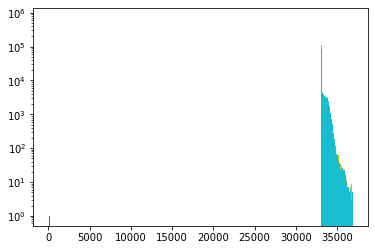

In [38]:
# Apply otsu thresholding to all images of each dataset - no preprocessing

otsu_img_N2DH_GOWT1_1 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_1 , 256)
otsu_img_N2DH_GOWT1_2 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_2 , 256)
otsu_img_N2DH_GOWT1_3 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_3 , 256)
otsu_img_N2DH_GOWT1_4 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_4 , 256)
otsu_img_N2DH_GOWT1_5 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_5 , 256)
otsu_img_N2DH_GOWT1_6 = ot.otsu_thresholding(copy_img_N2DH_GOWT1_6 , 256)


otsu_img_N2DL_HeLa_1 = ot.otsu_thresholding(copy_img_N2DL_HeLa_1 , 256) 
otsu_img_N2DL_HeLa_2 = ot.otsu_thresholding(copy_img_N2DL_HeLa_2 , 256) 
otsu_img_N2DL_HeLa_3 = ot.otsu_thresholding(copy_img_N2DL_HeLa_3 , 256) 
otsu_img_N2DL_HeLa_4 = ot.otsu_thresholding(copy_img_N2DL_HeLa_4 , 256) 


otsu_img_NIH3T3_1 = ot.otsu_thresholding(copy_img_NIH3T3_1 , 256)
otsu_img_NIH3T3_2 = ot.otsu_thresholding(copy_img_NIH3T3_2 , 256)
otsu_img_NIH3T3_3 = ot.otsu_thresholding(copy_img_NIH3T3_3 , 256)
otsu_img_NIH3T3_4 = ot.otsu_thresholding(copy_img_NIH3T3_4 , 256)
otsu_img_NIH3T3_5 = ot.otsu_thresholding(copy_img_NIH3T3_5 , 256)
otsu_img_NIH3T3_6 = ot.otsu_thresholding(copy_img_NIH3T3_6 , 256)
otsu_img_NIH3T3_7 = ot.otsu_thresholding(copy_img_NIH3T3_7 , 256)
otsu_img_NIH3T3_8 = ot.otsu_thresholding(copy_img_NIH3T3_8 , 256)
otsu_img_NIH3T3_9 = ot.otsu_thresholding(copy_img_NIH3T3_9 , 256)
otsu_img_NIH3T3_10 = ot.otsu_thresholding(copy_img_NIH3T3_10 , 256)
otsu_img_NIH3T3_11 = ot.otsu_thresholding(copy_img_NIH3T3_11 , 256)
otsu_img_NIH3T3_12 = ot.otsu_thresholding(copy_img_NIH3T3_12 , 256)
otsu_img_NIH3T3_13 = ot.otsu_thresholding(copy_img_NIH3T3_13 , 256)
otsu_img_NIH3T3_14 = ot.otsu_thresholding(copy_img_NIH3T3_14 , 256)
otsu_img_NIH3T3_15 = ot.otsu_thresholding(copy_img_NIH3T3_15 , 256)
otsu_img_NIH3T3_16 = ot.otsu_thresholding(copy_img_NIH3T3_16 , 256)
otsu_img_NIH3T3_17 = ot.otsu_thresholding(copy_img_NIH3T3_17 , 256)
otsu_img_NIH3T3_18 = ot.otsu_thresholding(copy_img_NIH3T3_18 , 256)

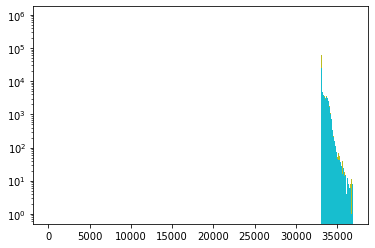

In [39]:
# Apply otsu thresholding to all images of each dataset - median filter

otsu_median_img_N2DH_GOWT1_1 = ot.otsu_thresholding(median_img_N2DH_GOWT1_1 , 256)
otsu_median_img_N2DH_GOWT1_2 = ot.otsu_thresholding(median_img_N2DH_GOWT1_2 , 256)
otsu_median_img_N2DH_GOWT1_3 = ot.otsu_thresholding(median_img_N2DH_GOWT1_3 , 256)
otsu_median_img_N2DH_GOWT1_4 = ot.otsu_thresholding(median_img_N2DH_GOWT1_4 , 256)
otsu_median_img_N2DH_GOWT1_5 = ot.otsu_thresholding(median_img_N2DH_GOWT1_5 , 256)
otsu_median_img_N2DH_GOWT1_6 = ot.otsu_thresholding(median_img_N2DH_GOWT1_6 , 256)


otsu_median_img_N2DL_HeLa_1 = ot.otsu_thresholding(median_img_N2DL_HeLa_1 , 256) 
otsu_median_img_N2DL_HeLa_2 = ot.otsu_thresholding(median_img_N2DL_HeLa_2 , 256) 
otsu_median_img_N2DL_HeLa_3 = ot.otsu_thresholding(median_img_N2DL_HeLa_3 , 256) 
otsu_median_img_N2DL_HeLa_4 = ot.otsu_thresholding(median_img_N2DL_HeLa_4 , 256) 


otsu_median_img_NIH3T3_1 = ot.otsu_thresholding(median_img_NIH3T3_1 , 256)
otsu_median_img_NIH3T3_2 = ot.otsu_thresholding(median_img_NIH3T3_2 , 256)
otsu_median_img_NIH3T3_3 = ot.otsu_thresholding(median_img_NIH3T3_3 , 256)
otsu_median_img_NIH3T3_4 = ot.otsu_thresholding(median_img_NIH3T3_4 , 256)
otsu_median_img_NIH3T3_5 = ot.otsu_thresholding(median_img_NIH3T3_5 , 256)
otsu_median_img_NIH3T3_6 = ot.otsu_thresholding(median_img_NIH3T3_6 , 256)
otsu_median_img_NIH3T3_7 = ot.otsu_thresholding(median_img_NIH3T3_7 , 256)
otsu_median_img_NIH3T3_8 = ot.otsu_thresholding(median_img_NIH3T3_8 , 256)
otsu_median_img_NIH3T3_9 = ot.otsu_thresholding(median_img_NIH3T3_9 , 256)
otsu_median_img_NIH3T3_10 = ot.otsu_thresholding(median_img_NIH3T3_10 , 256)
otsu_median_img_NIH3T3_11 = ot.otsu_thresholding(median_img_NIH3T3_11 , 256)
otsu_median_img_NIH3T3_12 = ot.otsu_thresholding(median_img_NIH3T3_12 , 256)
otsu_median_img_NIH3T3_13 = ot.otsu_thresholding(median_img_NIH3T3_13 , 256)
otsu_median_img_NIH3T3_14 = ot.otsu_thresholding(median_img_NIH3T3_14 , 256)
otsu_median_img_NIH3T3_15 = ot.otsu_thresholding(median_img_NIH3T3_15 , 256)
otsu_median_img_NIH3T3_16 = ot.otsu_thresholding(median_img_NIH3T3_16 , 256)
otsu_median_img_NIH3T3_17 = ot.otsu_thresholding(median_img_NIH3T3_17 , 256)
otsu_median_img_NIH3T3_18 = ot.otsu_thresholding(median_img_NIH3T3_18 , 256)

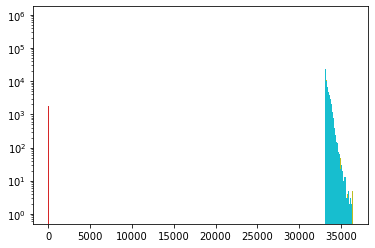

In [40]:
# Apply otsu thresholding to all images of each dataset - gaussian filter
otsu_gauss_img_N2DH_GOWT1_1 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_1 , 256)
otsu_gauss_img_N2DH_GOWT1_2 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_2 , 256)
otsu_gauss_img_N2DH_GOWT1_3 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_3 , 256)
otsu_gauss_img_N2DH_GOWT1_4 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_4 , 256)
otsu_gauss_img_N2DH_GOWT1_5 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_5 , 256)
otsu_gauss_img_N2DH_GOWT1_6 = ot.otsu_thresholding(gauss_img_N2DH_GOWT1_6 , 256)


otsu_gauss_img_N2DL_HeLa_1 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_1 , 256) 
otsu_gauss_img_N2DL_HeLa_2 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_2 , 256) 
otsu_gauss_img_N2DL_HeLa_3 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_3 , 256) 
otsu_gauss_img_N2DL_HeLa_4 = ot.otsu_thresholding(gauss_img_N2DL_HeLa_4 , 256) 


otsu_gauss_img_NIH3T3_1 = ot.otsu_thresholding(gauss_img_NIH3T3_1 , 256)
otsu_gauss_img_NIH3T3_2 = ot.otsu_thresholding(gauss_img_NIH3T3_2 , 256)
otsu_gauss_img_NIH3T3_3 = ot.otsu_thresholding(gauss_img_NIH3T3_3 , 256)
otsu_gauss_img_NIH3T3_4 = ot.otsu_thresholding(gauss_img_NIH3T3_4 , 256)
otsu_gauss_img_NIH3T3_5 = ot.otsu_thresholding(gauss_img_NIH3T3_5 , 256)
otsu_gauss_img_NIH3T3_6 = ot.otsu_thresholding(gauss_img_NIH3T3_6 , 256)
otsu_gauss_img_NIH3T3_7 = ot.otsu_thresholding(gauss_img_NIH3T3_7 , 256)
otsu_gauss_img_NIH3T3_8 = ot.otsu_thresholding(gauss_img_NIH3T3_8 , 256)
otsu_gauss_img_NIH3T3_9 = ot.otsu_thresholding(gauss_img_NIH3T3_9 , 256)
otsu_gauss_img_NIH3T3_10 = ot.otsu_thresholding(gauss_img_NIH3T3_10 , 256)
otsu_gauss_img_NIH3T3_11 = ot.otsu_thresholding(gauss_img_NIH3T3_11 , 256)
otsu_gauss_img_NIH3T3_12 = ot.otsu_thresholding(gauss_img_NIH3T3_12 , 256)
otsu_gauss_img_NIH3T3_13 = ot.otsu_thresholding(gauss_img_NIH3T3_13 , 256)
otsu_gauss_img_NIH3T3_14 = ot.otsu_thresholding(gauss_img_NIH3T3_14 , 256)
otsu_gauss_img_NIH3T3_15 = ot.otsu_thresholding(gauss_img_NIH3T3_15 , 256)
otsu_gauss_img_NIH3T3_16 = ot.otsu_thresholding(gauss_img_NIH3T3_16 , 256)
otsu_gauss_img_NIH3T3_17 = ot.otsu_thresholding(gauss_img_NIH3T3_17 , 256)
otsu_gauss_img_NIH3T3_18 = ot.otsu_thresholding(gauss_img_NIH3T3_18 , 256)


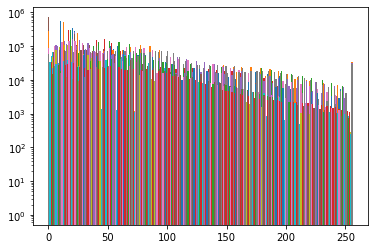

In [41]:
# Apply otsu thresholding to all images of each dataset - histogram stretching
otsu_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_1 , 256)
otsu_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_2 , 256)
otsu_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_3 , 256)
otsu_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_4 , 256)
otsu_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_5 , 256)
otsu_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(stretch_img_N2DH_GOWT1_6 , 256)


otsu_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_1 , 256) 
otsu_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_2 , 256) 
otsu_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_3 , 256) 
otsu_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(stretch_img_N2DL_HeLa_4 , 256) 

otsu_stretch_img_NIH3T3_1 = ot.otsu_thresholding(stretch_img_NIH3T3_1 , 256)
otsu_stretch_img_NIH3T3_2 = ot.otsu_thresholding(stretch_img_NIH3T3_2 , 256)
otsu_stretch_img_NIH3T3_3 = ot.otsu_thresholding(stretch_img_NIH3T3_3 , 256)
otsu_stretch_img_NIH3T3_4 = ot.otsu_thresholding(stretch_img_NIH3T3_4 , 256)
otsu_stretch_img_NIH3T3_5 = ot.otsu_thresholding(stretch_img_NIH3T3_5 , 256)
otsu_stretch_img_NIH3T3_6 = ot.otsu_thresholding(stretch_img_NIH3T3_6 , 256)
otsu_stretch_img_NIH3T3_7 = ot.otsu_thresholding(stretch_img_NIH3T3_7 , 256)
otsu_stretch_img_NIH3T3_8 = ot.otsu_thresholding(stretch_img_NIH3T3_8 , 256)
otsu_stretch_img_NIH3T3_9 = ot.otsu_thresholding(stretch_img_NIH3T3_9 , 256)
otsu_stretch_img_NIH3T3_10 = ot.otsu_thresholding(stretch_img_NIH3T3_10 , 256)
otsu_stretch_img_NIH3T3_11 = ot.otsu_thresholding(stretch_img_NIH3T3_11 , 256)
otsu_stretch_img_NIH3T3_12 = ot.otsu_thresholding(stretch_img_NIH3T3_12 , 256)
otsu_stretch_img_NIH3T3_13 = ot.otsu_thresholding(stretch_img_NIH3T3_13 , 256)
otsu_stretch_img_NIH3T3_14 = ot.otsu_thresholding(stretch_img_NIH3T3_14 , 256)
otsu_stretch_img_NIH3T3_15 = ot.otsu_thresholding(stretch_img_NIH3T3_15 , 256)
otsu_stretch_img_NIH3T3_16 = ot.otsu_thresholding(stretch_img_NIH3T3_16 , 256)
otsu_stretch_img_NIH3T3_17 = ot.otsu_thresholding(stretch_img_NIH3T3_17 , 256)
otsu_stretch_img_NIH3T3_18 = ot.otsu_thresholding(stretch_img_NIH3T3_18 , 256)


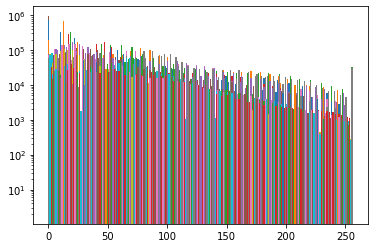

In [42]:
# Apply otsu thresholding to all images of each dataset - median filter and histogram stretching

otsu_median_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_1 , 256)
otsu_median_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_2 , 256)
otsu_median_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_3 , 256)
otsu_median_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_4 , 256)
otsu_median_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_5 , 256)
otsu_median_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(median_stretch_img_N2DH_GOWT1_6 , 256)


otsu_median_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_1 , 256) 
otsu_median_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_2 , 256) 
otsu_median_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_3 , 256) 
otsu_median_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(median_stretch_img_N2DL_HeLa_4 , 256) 


otsu_median_stretch_img_NIH3T3_1 = ot.otsu_thresholding(median_stretch_img_NIH3T3_1 , 256)
otsu_median_stretch_img_NIH3T3_2 = ot.otsu_thresholding(median_stretch_img_NIH3T3_2 , 256)
otsu_median_stretch_img_NIH3T3_3 = ot.otsu_thresholding(median_stretch_img_NIH3T3_3 , 256)
otsu_median_stretch_img_NIH3T3_4 = ot.otsu_thresholding(median_stretch_img_NIH3T3_4 , 256)
otsu_median_stretch_img_NIH3T3_5 = ot.otsu_thresholding(median_stretch_img_NIH3T3_5 , 256)
otsu_median_stretch_img_NIH3T3_6 = ot.otsu_thresholding(median_stretch_img_NIH3T3_6 , 256)
otsu_median_stretch_img_NIH3T3_7 = ot.otsu_thresholding(median_stretch_img_NIH3T3_7 , 256)
otsu_median_stretch_img_NIH3T3_8 = ot.otsu_thresholding(median_stretch_img_NIH3T3_8 , 256)
otsu_median_stretch_img_NIH3T3_9 = ot.otsu_thresholding(median_stretch_img_NIH3T3_9 , 256)
otsu_median_stretch_img_NIH3T3_10 = ot.otsu_thresholding(median_stretch_img_NIH3T3_10 , 256)
otsu_median_stretch_img_NIH3T3_11 = ot.otsu_thresholding(median_stretch_img_NIH3T3_11 , 256)
otsu_median_stretch_img_NIH3T3_12 = ot.otsu_thresholding(median_stretch_img_NIH3T3_12 , 256)
otsu_median_stretch_img_NIH3T3_13 = ot.otsu_thresholding(median_stretch_img_NIH3T3_13 , 256)
otsu_median_stretch_img_NIH3T3_14 = ot.otsu_thresholding(median_stretch_img_NIH3T3_14 , 256)
otsu_median_stretch_img_NIH3T3_15 = ot.otsu_thresholding(median_stretch_img_NIH3T3_15 , 256)
otsu_median_stretch_img_NIH3T3_16 = ot.otsu_thresholding(median_stretch_img_NIH3T3_16 , 256)
otsu_median_stretch_img_NIH3T3_17 = ot.otsu_thresholding(median_stretch_img_NIH3T3_17 , 256)
otsu_median_stretch_img_NIH3T3_18 = ot.otsu_thresholding(median_stretch_img_NIH3T3_18 , 256)


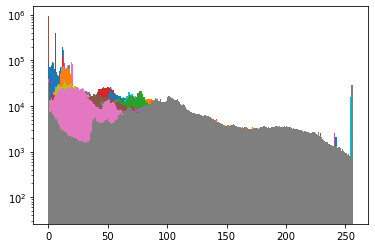

In [69]:
# Apply otsu thresholding to all images of each dataset - gaussian filter and histogram stretching

otsu_gauss_stretch_img_N2DH_GOWT1_1 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_1 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_2 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_2 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_3 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_3 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_4 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_4 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_5 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_5 , 256)
otsu_gauss_stretch_img_N2DH_GOWT1_6 = ot.otsu_thresholding(gauss_stretch_img_N2DH_GOWT1_6 , 256)


otsu_gauss_stretch_img_N2DL_HeLa_1 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_1 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_2 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_2 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_3 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_3 , 256) 
otsu_gauss_stretch_img_N2DL_HeLa_4 = ot.otsu_thresholding(gauss_stretch_img_N2DL_HeLa_4 , 256) 


otsu_gauss_stretch_img_NIH3T3_1 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_1 , 256)
otsu_gauss_stretch_img_NIH3T3_2 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_2 , 256)
otsu_gauss_stretch_img_NIH3T3_3 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_3 , 256)
otsu_gauss_stretch_img_NIH3T3_4 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_4 , 256)
otsu_gauss_stretch_img_NIH3T3_5 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_5 , 256)
otsu_gauss_stretch_img_NIH3T3_6 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_6 , 256)
otsu_gauss_stretch_img_NIH3T3_7 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_7 , 256)
otsu_gauss_stretch_img_NIH3T3_8 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_8 , 256)
otsu_gauss_stretch_img_NIH3T3_9 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_9 , 256)
otsu_gauss_stretch_img_NIH3T3_10 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_10 , 256)
otsu_gauss_stretch_img_NIH3T3_11 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_11 , 256)
otsu_gauss_stretch_img_NIH3T3_12 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_12 , 256)
otsu_gauss_stretch_img_NIH3T3_13 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_13 , 256)
otsu_gauss_stretch_img_NIH3T3_14 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_14 , 256)
otsu_gauss_stretch_img_NIH3T3_15 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_15 , 256)
otsu_gauss_stretch_img_NIH3T3_16 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_16 , 256)
otsu_gauss_stretch_img_NIH3T3_17 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_17 , 256)
otsu_gauss_stretch_img_NIH3T3_18 = ot.otsu_thresholding(gauss_stretch_img_NIH3T3_18 , 256)


In [44]:
# Dice score - N2DH-GOWT1-dataset
## no preprocessing

thresholded = [otsu_img_N2DH_GOWT1_1 , otsu_img_N2DH_GOWT1_2 , otsu_img_N2DH_GOWT1_3 , otsu_img_N2DH_GOWT1_4 , otsu_img_N2DH_GOWT1_5 , otsu_img_N2DH_GOWT1_6]
ground_truth = [gt_N2DH_GOWT1_1 , gt_N2DH_GOWT1_2 , gt_N2DH_GOWT1_3 , gt_N2DH_GOWT1_4 , gt_N2DH_GOWT1_5 , gt_N2DH_GOWT1_6]

N2DH_GOWT1_no_preprocessing = []

dice_otsu_img_N2DH_GOWT1_1 = dice(0)
dice_otsu_img_N2DH_GOWT1_2 = dice(1)
dice_otsu_img_N2DH_GOWT1_3 = dice(2)
dice_otsu_img_N2DH_GOWT1_4 = dice(3)
dice_otsu_img_N2DH_GOWT1_5 = dice(4)
dice_otsu_img_N2DH_GOWT1_6 = dice(5)

N2DH_GOWT1_no_preprocessing.extend([dice_otsu_img_N2DH_GOWT1_1 , dice_otsu_img_N2DH_GOWT1_2 , dice_otsu_img_N2DH_GOWT1_3 , dice_otsu_img_N2DH_GOWT1_4 , dice_otsu_img_N2DH_GOWT1_5 , dice_otsu_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_no_preprocessing)


[0.5705017182130584, 0.5321692131795032, 0.568002229254991, 0.5830196570472606, 0.6502180828858916, 0.588161094224924]


In [45]:
# Dice score - N2DH-GOWT1-dataset
## median filter

thresholded = [otsu_median_img_N2DH_GOWT1_1 , otsu_median_img_N2DH_GOWT1_2 , otsu_median_img_N2DH_GOWT1_3 , otsu_median_img_N2DH_GOWT1_4 , otsu_median_img_N2DH_GOWT1_5 , otsu_median_img_N2DH_GOWT1_6]
ground_truth = [gt_N2DH_GOWT1_1 , gt_N2DH_GOWT1_2 , gt_N2DH_GOWT1_3 , gt_N2DH_GOWT1_4 , gt_N2DH_GOWT1_5 , gt_N2DH_GOWT1_6]

N2DH_GOWT1_median_filter = []

dice_otsu_median_img_N2DH_GOWT1_1 = dice(0)
dice_otsu_median_img_N2DH_GOWT1_2 = dice(1)
dice_otsu_median_img_N2DH_GOWT1_3 = dice(2)
dice_otsu_median_img_N2DH_GOWT1_4 = dice(3)
dice_otsu_median_img_N2DH_GOWT1_5 = dice(4)
dice_otsu_median_img_N2DH_GOWT1_6 = dice(5)

N2DH_GOWT1_median_filter.extend([dice_otsu_median_img_N2DH_GOWT1_1 , dice_otsu_median_img_N2DH_GOWT1_2 , dice_otsu_median_img_N2DH_GOWT1_3 , dice_otsu_median_img_N2DH_GOWT1_4 , dice_otsu_median_img_N2DH_GOWT1_5 , dice_otsu_median_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter)

[0.6037089513424323, 0.5424736733429693, 0.5957841500444236, 0.6207683116695029, 0.6151315544639202, 0.6342945864207978]


In [46]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter

thresholded = [otsu_gauss_img_N2DH_GOWT1_1 , otsu_gauss_img_N2DH_GOWT1_2 , otsu_gauss_img_N2DH_GOWT1_3 , otsu_gauss_img_N2DH_GOWT1_4 , otsu_gauss_img_N2DH_GOWT1_5 , otsu_gauss_img_N2DH_GOWT1_6]
ground_truth = [gt_N2DH_GOWT1_1 , gt_N2DH_GOWT1_2 , gt_N2DH_GOWT1_3 , gt_N2DH_GOWT1_4 , gt_N2DH_GOWT1_5 , gt_N2DH_GOWT1_6]

N2DH_GOWT1_gaussian_filter = []

dice_otsu_gauss_img_N2DH_GOWT1_1 = dice(0)
dice_otsu_gauss_img_N2DH_GOWT1_2 = dice(1)
dice_otsu_gauss_img_N2DH_GOWT1_3 = dice(2)
dice_otsu_gauss_img_N2DH_GOWT1_4 = dice(3)
dice_otsu_gauss_img_N2DH_GOWT1_5 = dice(4)
dice_otsu_gauss_img_N2DH_GOWT1_6 = dice(5)

N2DH_GOWT1_gaussian_filter.extend([dice_otsu_gauss_img_N2DH_GOWT1_1 , dice_otsu_gauss_img_N2DH_GOWT1_2 , dice_otsu_gauss_img_N2DH_GOWT1_3 , dice_otsu_gauss_img_N2DH_GOWT1_4 , dice_otsu_gauss_img_N2DH_GOWT1_5 , dice_otsu_gauss_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter)


[0.6273319170529901, 0.56022059415506, 0.6150179010645673, 0.6392636201237273, 0.6230876619384146, 0.6038669828815451]


In [47]:
# Dice score - N2DH-GOWT1-dataset
## histogram stretching

thresholded = [otsu_stretch_img_N2DH_GOWT1_1 , otsu_stretch_img_N2DH_GOWT1_2 , otsu_stretch_img_N2DH_GOWT1_3 , otsu_stretch_img_N2DH_GOWT1_4 , otsu_stretch_img_N2DH_GOWT1_5 , otsu_stretch_img_N2DH_GOWT1_6]
ground_truth = [gt_N2DH_GOWT1_1 , gt_N2DH_GOWT1_2 , gt_N2DH_GOWT1_3 , gt_N2DH_GOWT1_4 , gt_N2DH_GOWT1_5 , gt_N2DH_GOWT1_6]

N2DH_GOWT1_histogram_stretching = []

dice_otsu_stretch_img_N2DH_GOWT1_1 = dice(0)
dice_otsu_stretch_img_N2DH_GOWT1_2 = dice(1)
dice_otsu_stretch_img_N2DH_GOWT1_3 = dice(2)
dice_otsu_stretch_img_N2DH_GOWT1_4 = dice(3)
dice_otsu_stretch_img_N2DH_GOWT1_5 = dice(4)
dice_otsu_stretch_img_N2DH_GOWT1_6 = dice(5)

N2DH_GOWT1_histogram_stretching.extend([dice_otsu_stretch_img_N2DH_GOWT1_1 , dice_otsu_stretch_img_N2DH_GOWT1_2 , dice_otsu_stretch_img_N2DH_GOWT1_3 , dice_otsu_stretch_img_N2DH_GOWT1_4 , dice_otsu_stretch_img_N2DH_GOWT1_5 , dice_otsu_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_histogram_stretching)

[0.391259749380845, 0.5416556982265252, 0.5521517274173784, 0.5319558086045021, 0.58230395466762, 0.5919382097015238]


In [48]:
# Dice score - N2DH-GOWT1-dataset
## median filter and histogram stretching

thresholded = [otsu_median_stretch_img_N2DH_GOWT1_1 , otsu_median_stretch_img_N2DH_GOWT1_2 , otsu_median_stretch_img_N2DH_GOWT1_3 , otsu_median_stretch_img_N2DH_GOWT1_4 , otsu_median_stretch_img_N2DH_GOWT1_5 , otsu_median_stretch_img_N2DH_GOWT1_6]
ground_truth = [gt_N2DH_GOWT1_1 , gt_N2DH_GOWT1_2 , gt_N2DH_GOWT1_3 , gt_N2DH_GOWT1_4 , gt_N2DH_GOWT1_5 , gt_N2DH_GOWT1_6]

N2DH_GOWT1_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DH_GOWT1_1 = dice(0)
dice_otsu_median_stretch_img_N2DH_GOWT1_2 = dice(1)
dice_otsu_median_stretch_img_N2DH_GOWT1_3 = dice(2)
dice_otsu_median_stretch_img_N2DH_GOWT1_4 = dice(3)
dice_otsu_median_stretch_img_N2DH_GOWT1_5 = dice(4)
dice_otsu_median_stretch_img_N2DH_GOWT1_6 = dice(5)

N2DH_GOWT1_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DH_GOWT1_1 , dice_otsu_median_stretch_img_N2DH_GOWT1_2 , dice_otsu_median_stretch_img_N2DH_GOWT1_3 , dice_otsu_median_stretch_img_N2DH_GOWT1_4 , dice_otsu_median_stretch_img_N2DH_GOWT1_5 , dice_otsu_median_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_median_filter_histogram_stretching)

[0.6381964496232637, 0.5348748387096774, 0.6075597183447513, 0.5548651120687217, 0.653909224429266, 0.6589934005159855]


In [49]:
# Dice score - N2DH-GOWT1-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_N2DH_GOWT1_1 , otsu_gauss_stretch_img_N2DH_GOWT1_2 , otsu_gauss_stretch_img_N2DH_GOWT1_3 , otsu_gauss_stretch_img_N2DH_GOWT1_4 , otsu_gauss_stretch_img_N2DH_GOWT1_5 , otsu_gauss_stretch_img_N2DH_GOWT1_6]
ground_truth = [gt_N2DH_GOWT1_1 , gt_N2DH_GOWT1_2 , gt_N2DH_GOWT1_3 , gt_N2DH_GOWT1_4 , gt_N2DH_GOWT1_5 , gt_N2DH_GOWT1_6]

N2DH_GOWT1_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 = dice(0)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 = dice(1)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 = dice(2)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 = dice(3)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 = dice(4)
dice_otsu_gauss_stretch_img_N2DH_GOWT1_6 = dice(5)

N2DH_GOWT1_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DH_GOWT1_1 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_2 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_3 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_4 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_5 , dice_otsu_gauss_stretch_img_N2DH_GOWT1_6])

print(N2DH_GOWT1_gaussian_filter_histogram_stretching)

[0.6298848014256619, 0.5518328065292258, 0.5741515955748904, 0.571533286211681, 0.6779363982909918, 0.6207203749897207]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_6641/936305495.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram stretching' , 'median filter and histogram stretching' , 'gaussian filter and histogram stretching'])


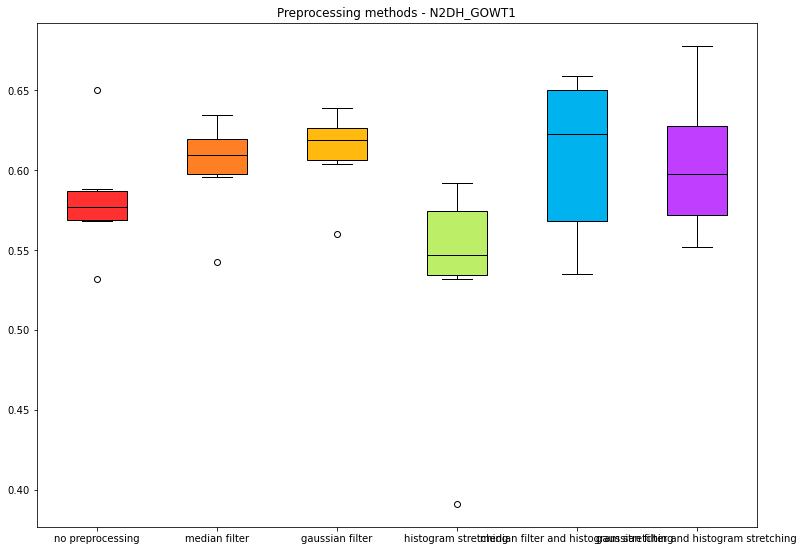

In [50]:
# Dice score - preprocessing - N2DH-GOWT1-dataset - boxplot

data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_gaussian_filter_histogram_stretching]

fig_1 = plt.figure(figsize = (10 , 7))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram stretching' , 'median filter and histogram stretching' , 'gaussian filter and histogram stretching'])
plt.title("Preprocessing methods - N2DH_GOWT1")
bp = ax.boxplot(data_N2DH_GOWT1, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)



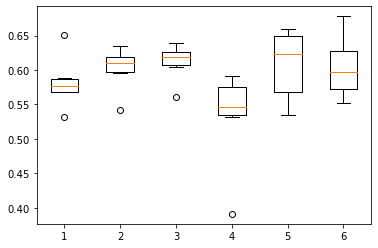

In [51]:
data_N2DH_GOWT1 = [N2DH_GOWT1_no_preprocessing , N2DH_GOWT1_median_filter , N2DH_GOWT1_gaussian_filter , N2DH_GOWT1_histogram_stretching , N2DH_GOWT1_median_filter_histogram_stretching , N2DH_GOWT1_gaussian_filter_histogram_stretching]

boxplot_N2DH_GOWT1 = plt.boxplot(data_N2DH_GOWT1 )

In [52]:
# Dice score - N2DLHeLa-dataset
## no preprocessing

thresholded = [otsu_img_N2DL_HeLa_1 , otsu_img_N2DL_HeLa_2 , otsu_img_N2DL_HeLa_3 , otsu_img_N2DL_HeLa_4]
ground_truth = [gt_N2DL_HeLa_1 , gt_N2DL_HeLa_2 , gt_N2DL_HeLa_3 , gt_N2DL_HeLa_4]

N2DLHeLa_no_preprocessing = []

dice_otsu_img_N2DL_HeLa_1 = dice(0)
dice_otsu_img_N2DL_HeLa_2 = dice(1)
dice_otsu_img_N2DL_HeLa_3 = dice(2)
dice_otsu_img_N2DL_HeLa_4 = dice(3)

N2DLHeLa_no_preprocessing.extend([dice_otsu_img_N2DL_HeLa_1 , dice_otsu_img_N2DL_HeLa_2 , dice_otsu_img_N2DL_HeLa_3 , dice_otsu_img_N2DL_HeLa_4])

print(N2DLHeLa_no_preprocessing)


[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]


In [53]:
# Dice score - N2DLHeLa-dataset
## median filter

thresholded = [otsu_median_img_N2DL_HeLa_1 , otsu_median_img_N2DL_HeLa_2 , otsu_median_img_N2DL_HeLa_3 , otsu_median_img_N2DL_HeLa_4]
ground_truth = [gt_N2DL_HeLa_1 , gt_N2DL_HeLa_2 , gt_N2DL_HeLa_3 , gt_N2DL_HeLa_4]

N2DLHeLa_median_filter = []

dice_otsu_median_img_N2DL_HeLa_1 = dice(0)
dice_otsu_median_img_N2DL_HeLa_2 = dice(1)
dice_otsu_median_img_N2DL_HeLa_3 = dice(2)
dice_otsu_median_img_N2DL_HeLa_4 = dice(3)

N2DLHeLa_median_filter.extend([dice_otsu_median_img_N2DL_HeLa_1 , dice_otsu_median_img_N2DL_HeLa_2 , dice_otsu_median_img_N2DL_HeLa_3 , dice_otsu_median_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter)

[0.6891183757591703, 0.6607444463067779, 0.7814894725094859, 0.7790908261014244]


In [54]:
# Dice score - N2DLHeLa-dataset
## gaussian filter

thresholded = [otsu_gauss_img_N2DL_HeLa_1 , otsu_gauss_img_N2DL_HeLa_2 , otsu_gauss_img_N2DL_HeLa_3 , otsu_gauss_img_N2DL_HeLa_4]
ground_truth = [gt_N2DL_HeLa_1 , gt_N2DL_HeLa_2 , gt_N2DL_HeLa_3 , gt_N2DL_HeLa_4]

N2DLHeLa_gaussian_filter = []

dice_otsu_gauss_img_N2DL_HeLa_1 = dice(0)
dice_otsu_gauss_img_N2DL_HeLa_2 = dice(1)
dice_otsu_gauss_img_N2DL_HeLa_3 = dice(2)
dice_otsu_gauss_img_N2DL_HeLa_4 = dice(3)

N2DLHeLa_gaussian_filter.extend([dice_otsu_gauss_img_N2DL_HeLa_1 , dice_otsu_gauss_img_N2DL_HeLa_2 , dice_otsu_gauss_img_N2DL_HeLa_3 , dice_otsu_gauss_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter)

[0.7353255276596571, 0.684857480808034, 0.7528828655295244, 0.7545053427697168]


In [55]:
# Dice score - NN2DLHeLa-dataset
## histogram stretching

thresholded = [otsu_stretch_img_N2DL_HeLa_1 , otsu_stretch_img_N2DL_HeLa_2 , otsu_stretch_img_N2DL_HeLa_3 , otsu_stretch_img_N2DL_HeLa_4]
ground_truth = [gt_N2DL_HeLa_1 , gt_N2DL_HeLa_2 , gt_N2DL_HeLa_3 , gt_N2DL_HeLa_4]

N2DLHeLa_histogram_stretching = []

dice_otsu_stretch_img_N2DL_HeLa_1 = dice(0)
dice_otsu_stretch_img_N2DL_HeLa_2 = dice(1)
dice_otsu_stretch_img_N2DL_HeLa_3 = dice(2)
dice_otsu_stretch_img_N2DL_HeLa_4 = dice(3)

N2DLHeLa_histogram_stretching.extend([dice_otsu_stretch_img_N2DL_HeLa_1 , dice_otsu_stretch_img_N2DL_HeLa_2 , dice_otsu_stretch_img_N2DL_HeLa_3 , dice_otsu_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_histogram_stretching)

[0.809730635140136, 0.8146261556413248, 0.7972511209448173, 0.795759151830366]


In [56]:
# Dice score - N2DLHeLa-dataset
## median filter and histogram stretching

thresholded = [otsu_median_stretch_img_N2DL_HeLa_1 , otsu_median_stretch_img_N2DL_HeLa_2 , otsu_median_stretch_img_N2DL_HeLa_3 , otsu_median_stretch_img_N2DL_HeLa_4]
ground_truth = [gt_N2DL_HeLa_1 , gt_N2DL_HeLa_2 , gt_N2DL_HeLa_3 , gt_N2DL_HeLa_4]

N2DLHeLa_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_N2DL_HeLa_1 = dice(0)
dice_otsu_median_stretch_img_N2DL_HeLa_2 = dice(1)
dice_otsu_median_stretch_img_N2DL_HeLa_3 = dice(2)
dice_otsu_median_stretch_img_N2DL_HeLa_4 = dice(3)

N2DLHeLa_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_N2DL_HeLa_1 , dice_otsu_median_stretch_img_N2DL_HeLa_2 , dice_otsu_median_stretch_img_N2DL_HeLa_3 , dice_otsu_median_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_median_filter_histogram_stretching)

[0.8079542571668326, 0.8118430825324661, 0.797903810535371, 0.7967217574250979]


In [57]:
# Dice score - N2DLHeLa-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_N2DL_HeLa_1 , otsu_gauss_stretch_img_N2DL_HeLa_2 , otsu_gauss_stretch_img_N2DL_HeLa_3 , otsu_gauss_stretch_img_N2DL_HeLa_4]
ground_truth = [gt_N2DL_HeLa_1 , gt_N2DL_HeLa_2 , gt_N2DL_HeLa_3 , gt_N2DL_HeLa_4]

N2DLHeLa_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_N2DL_HeLa_1 = dice(0)
dice_otsu_gauss_stretch_img_N2DL_HeLa_2 = dice(1)
dice_otsu_gauss_stretch_img_N2DL_HeLa_3 = dice(2)
dice_otsu_gauss_stretch_img_N2DL_HeLa_4 = dice(3)

N2DLHeLa_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_N2DL_HeLa_1 , dice_otsu_gauss_stretch_img_N2DL_HeLa_2 , dice_otsu_gauss_stretch_img_N2DL_HeLa_3 , dice_otsu_gauss_stretch_img_N2DL_HeLa_4])

print(N2DLHeLa_gaussian_filter_histogram_stretching)

[0.7198842201118772, 0.7503948838463613, 0.7694831326744034, 0.7680709706376164]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_6641/447744913.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram stretching' , 'median filter and histogram stretching' , 'gaussian filter and histogram stretching'])


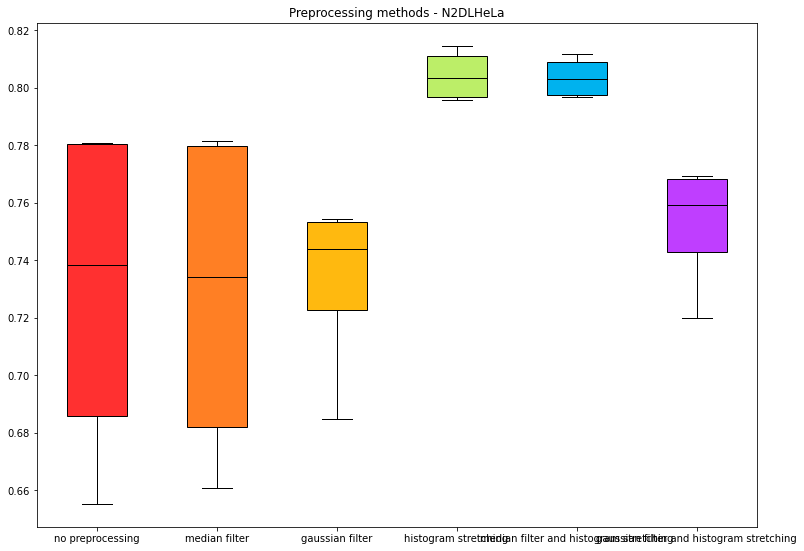

In [62]:
# Dice score - preprocessing - N2DLHeLa-dataset - boxplot

data_N2DLHeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_gaussian_filter_histogram_stretching]

fig_1 = plt.figure(figsize = (10 , 7))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram stretching' , 'median filter and histogram stretching' , 'gaussian filter and histogram stretching'])
plt.title("Preprocessing methods - N2DLHeLa")
bp = ax.boxplot(data_N2DLHeLa, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

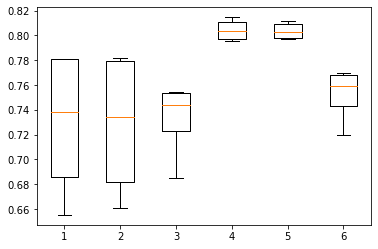

In [61]:
data_N2DLHeLa = [N2DLHeLa_no_preprocessing , N2DLHeLa_median_filter , N2DLHeLa_gaussian_filter , N2DLHeLa_histogram_stretching , N2DLHeLa_median_filter_histogram_stretching , N2DLHeLa_gaussian_filter_histogram_stretching]

boxplot_N2DLHeLa = plt.boxplot(data_N2DLHeLa)

In [63]:
# Dice score - NIH3T3-dataset
## no preprocessing

thresholded = [otsu_img_NIH3T3_1 , otsu_img_NIH3T3_2 , otsu_img_NIH3T3_3, otsu_img_NIH3T3_4 , otsu_img_NIH3T3_5 , otsu_img_NIH3T3_6 , otsu_img_NIH3T3_7 , otsu_img_NIH3T3_8 , otsu_img_NIH3T3_9 , otsu_img_NIH3T3_10 , otsu_img_NIH3T3_11 , otsu_img_NIH3T3_12 , otsu_img_NIH3T3_13 , otsu_img_NIH3T3_14 , otsu_img_NIH3T3_15 , otsu_img_NIH3T3_16 , otsu_img_NIH3T3_17 , otsu_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_no_preprocessing = []

dice_otsu_img_NIH3T3_1 = dice(0)
dice_otsu_img_NIH3T3_2 = dice(1)
dice_otsu_img_NIH3T3_3 = dice(2)
dice_otsu_img_NIH3T3_4 = dice(3)
dice_otsu_img_NIH3T3_5 = dice(4)
dice_otsu_img_NIH3T3_6 = dice(5)
dice_otsu_img_NIH3T3_7 = dice(6)
dice_otsu_img_NIH3T3_8 = dice(7)
dice_otsu_img_NIH3T3_9 = dice(8)
dice_otsu_img_NIH3T3_10 = dice(9)
dice_otsu_img_NIH3T3_11 = dice(10)
dice_otsu_img_NIH3T3_12 = dice(11)
dice_otsu_img_NIH3T3_13 = dice(12)
dice_otsu_img_NIH3T3_14 = dice(13)
dice_otsu_img_NIH3T3_15 = dice(14)
dice_otsu_img_NIH3T3_16 = dice(15)
dice_otsu_img_NIH3T3_17 = dice(16)
dice_otsu_img_NIH3T3_18 = dice(17)



NIH3T3_no_preprocessing.extend([dice_otsu_img_NIH3T3_1 , dice_otsu_img_NIH3T3_2 , dice_otsu_img_NIH3T3_3 , dice_otsu_img_NIH3T3_4 , dice_otsu_img_NIH3T3_5 , dice_otsu_img_NIH3T3_6 , dice_otsu_img_NIH3T3_7 , dice_otsu_img_NIH3T3_8 , dice_otsu_img_NIH3T3_9 , dice_otsu_img_NIH3T3_10 , dice_otsu_img_NIH3T3_11 , dice_otsu_img_NIH3T3_12 , dice_otsu_img_NIH3T3_13 , dice_otsu_img_NIH3T3_14 , dice_otsu_img_NIH3T3_15 , dice_otsu_img_NIH3T3_16 , dice_otsu_img_NIH3T3_17 , dice_otsu_img_NIH3T3_18])

print(NIH3T3_no_preprocessing)

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]


In [64]:
# Dice score - N2DLHeLa-dataset
## median filter

thresholded = [otsu_median_img_NIH3T3_1 , otsu_median_img_NIH3T3_2 , otsu_median_img_NIH3T3_3, otsu_median_img_NIH3T3_4 , otsu_median_img_NIH3T3_5 , otsu_median_img_NIH3T3_6 , otsu_median_img_NIH3T3_7 , otsu_median_img_NIH3T3_8 , otsu_median_img_NIH3T3_9 , otsu_median_img_NIH3T3_10 , otsu_median_img_NIH3T3_11 , otsu_median_img_NIH3T3_12 , otsu_median_img_NIH3T3_13 , otsu_median_img_NIH3T3_14 , otsu_median_img_NIH3T3_15 , otsu_median_img_NIH3T3_16 , otsu_median_img_NIH3T3_17 , otsu_median_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_median_filter = []

dice_otsu_median_img_NIH3T3_1 = dice(0)
dice_otsu_median_img_NIH3T3_2 = dice(1)
dice_otsu_median_img_NIH3T3_3 = dice(2)
dice_otsu_median_img_NIH3T3_4 = dice(3)
dice_otsu_median_img_NIH3T3_5 = dice(4)
dice_otsu_median_img_NIH3T3_6 = dice(5)
dice_otsu_median_img_NIH3T3_7 = dice(6)
dice_otsu_median_img_NIH3T3_8 = dice(7)
dice_otsu_median_img_NIH3T3_9 = dice(8)
dice_otsu_median_img_NIH3T3_10 = dice(9)
dice_otsu_median_img_NIH3T3_11 = dice(10)
dice_otsu_median_img_NIH3T3_12 = dice(11)
dice_otsu_median_img_NIH3T3_13 = dice(12)
dice_otsu_median_img_NIH3T3_14 = dice(13)
dice_otsu_median_img_NIH3T3_15 = dice(14)
dice_otsu_median_img_NIH3T3_16 = dice(15)
dice_otsu_median_img_NIH3T3_17 = dice(16)
dice_otsu_median_img_NIH3T3_18 = dice(17)



NIH3T3_median_filter.extend([dice_otsu_median_img_NIH3T3_1 , dice_otsu_median_img_NIH3T3_2 , dice_otsu_median_img_NIH3T3_3 , dice_otsu_median_img_NIH3T3_4 , dice_otsu_median_img_NIH3T3_5 , dice_otsu_median_img_NIH3T3_6 , dice_otsu_median_img_NIH3T3_7 , dice_otsu_median_img_NIH3T3_8 , dice_otsu_median_img_NIH3T3_9 , dice_otsu_median_img_NIH3T3_10 , dice_otsu_median_img_NIH3T3_11 , dice_otsu_median_img_NIH3T3_12 , dice_otsu_median_img_NIH3T3_13 , dice_otsu_median_img_NIH3T3_14 , dice_otsu_median_img_NIH3T3_15 , dice_otsu_median_img_NIH3T3_16 , dice_otsu_median_img_NIH3T3_17 , dice_otsu_median_img_NIH3T3_18])

print(NIH3T3_median_filter)

[0.8946808298799254, 0.8849869001333296, 0.8300675280378401, 0.7357748411841214, 0.7529539648467392, 0.6170388301551231, 0.6099779516517357, 0.6973465117594204, 0.03084486966478485, 0.4631152690677724, 0.0, 0.6824470203713232, 0.00014050370578524009, 0.5739847098266359, 0.6282657339684911, 0.06504850709187047, 0.0682745069747111, 0.7978706098963664]


In [65]:
# Dice score - NIH3T3-dataset
## gaussian filter

thresholded = [otsu_gauss_img_NIH3T3_1 , otsu_gauss_img_NIH3T3_2 , otsu_gauss_img_NIH3T3_3, otsu_gauss_img_NIH3T3_4 , otsu_gauss_img_NIH3T3_5 , otsu_gauss_img_NIH3T3_6 , otsu_gauss_img_NIH3T3_7 , otsu_gauss_img_NIH3T3_8 , otsu_gauss_img_NIH3T3_9 , otsu_gauss_img_NIH3T3_10 , otsu_gauss_img_NIH3T3_11 , otsu_gauss_img_NIH3T3_12 , otsu_gauss_img_NIH3T3_13 , otsu_gauss_img_NIH3T3_14 , otsu_gauss_img_NIH3T3_15 , otsu_gauss_img_NIH3T3_16 , otsu_gauss_img_NIH3T3_17 , otsu_gauss_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_gaussian_filter = []

dice_otsu_gauss_img_NIH3T3_1 = dice(0)
dice_otsu_gauss_img_NIH3T3_2 = dice(1)
dice_otsu_gauss_img_NIH3T3_3 = dice(2)
dice_otsu_gauss_img_NIH3T3_4 = dice(3)
dice_otsu_gauss_img_NIH3T3_5 = dice(4)
dice_otsu_gauss_img_NIH3T3_6 = dice(5)
dice_otsu_gauss_img_NIH3T3_7 = dice(6)
dice_otsu_gauss_img_NIH3T3_8 = dice(7)
dice_otsu_gauss_img_NIH3T3_9 = dice(8)
dice_otsu_gauss_img_NIH3T3_10 = dice(9)
dice_otsu_gauss_img_NIH3T3_11 = dice(10)
dice_otsu_gauss_img_NIH3T3_12 = dice(11)
dice_otsu_gauss_img_NIH3T3_13 = dice(12)
dice_otsu_gauss_img_NIH3T3_14 = dice(13)
dice_otsu_gauss_img_NIH3T3_15 = dice(14)
dice_otsu_gauss_img_NIH3T3_16 = dice(15)
dice_otsu_gauss_img_NIH3T3_17 = dice(16)
dice_otsu_gauss_img_NIH3T3_18 = dice(17)



NIH3T3_gaussian_filter.extend([dice_otsu_gauss_img_NIH3T3_1 , dice_otsu_gauss_img_NIH3T3_2 , dice_otsu_gauss_img_NIH3T3_3 , dice_otsu_gauss_img_NIH3T3_4 , dice_otsu_gauss_img_NIH3T3_5 , dice_otsu_gauss_img_NIH3T3_6 , dice_otsu_gauss_img_NIH3T3_7 , dice_otsu_gauss_img_NIH3T3_8 , dice_otsu_gauss_img_NIH3T3_9 , dice_otsu_gauss_img_NIH3T3_10 , dice_otsu_gauss_img_NIH3T3_11 , dice_otsu_gauss_img_NIH3T3_12 , dice_otsu_gauss_img_NIH3T3_13 , dice_otsu_gauss_img_NIH3T3_14 , dice_otsu_gauss_img_NIH3T3_15 , dice_otsu_gauss_img_NIH3T3_16 , dice_otsu_gauss_img_NIH3T3_17 , dice_otsu_gauss_img_NIH3T3_18])

print(NIH3T3_gaussian_filter)

[0.9082523752671016, 0.8932649125192117, 0.8208764032672039, 0.7371588919071718, 0.7507718679691837, 0.6606204786655497, 0.654503146981438, 0.7239110450042866, 0.03142585690272601, 0.4513501308445844, 0.0, 0.6764291468715086, 0.00024496830722525276, 0.5780641819580601, 0.6075115822469912, 0.05041662344846662, 0.07566175730533096, 0.7836327416656241]


In [66]:
# Dice score - NIH3T3-dataset
## histogram stretching

thresholded = [otsu_stretch_img_NIH3T3_1 , otsu_stretch_img_NIH3T3_2 , otsu_stretch_img_NIH3T3_3, otsu_stretch_img_NIH3T3_4 , otsu_stretch_img_NIH3T3_5 , otsu_stretch_img_NIH3T3_6 , otsu_stretch_img_NIH3T3_7 , otsu_stretch_img_NIH3T3_8 , otsu_stretch_img_NIH3T3_9 , otsu_stretch_img_NIH3T3_10 , otsu_stretch_img_NIH3T3_11 , otsu_stretch_img_NIH3T3_12 , otsu_stretch_img_NIH3T3_13 , otsu_stretch_img_NIH3T3_14 , otsu_stretch_img_NIH3T3_15 , otsu_stretch_img_NIH3T3_16 , otsu_stretch_img_NIH3T3_17 , otsu_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_histogram_stretching = []

dice_otsu_stretch_img_NIH3T3_1 = dice(0)
dice_otsu_stretch_img_NIH3T3_2 = dice(1)
dice_otsu_stretch_img_NIH3T3_3 = dice(2)
dice_otsu_stretch_img_NIH3T3_4 = dice(3)
dice_otsu_stretch_img_NIH3T3_5 = dice(4)
dice_otsu_stretch_img_NIH3T3_6 = dice(5)
dice_otsu_stretch_img_NIH3T3_7 = dice(6)
dice_otsu_stretch_img_NIH3T3_8 = dice(7)
dice_otsu_stretch_img_NIH3T3_9 = dice(8)
dice_otsu_stretch_img_NIH3T3_10 = dice(9)
dice_otsu_stretch_img_NIH3T3_11 = dice(10)
dice_otsu_stretch_img_NIH3T3_12 = dice(11)
dice_otsu_stretch_img_NIH3T3_13 = dice(12)
dice_otsu_stretch_img_NIH3T3_14 = dice(13)
dice_otsu_stretch_img_NIH3T3_15 = dice(14)
dice_otsu_stretch_img_NIH3T3_16 = dice(15)
dice_otsu_stretch_img_NIH3T3_17 = dice(16)
dice_otsu_stretch_img_NIH3T3_18 = dice(17)



NIH3T3_histogram_stretching.extend([dice_otsu_stretch_img_NIH3T3_1 , dice_otsu_stretch_img_NIH3T3_2 , dice_otsu_stretch_img_NIH3T3_3 , dice_otsu_stretch_img_NIH3T3_4 , dice_otsu_stretch_img_NIH3T3_5 , dice_otsu_stretch_img_NIH3T3_6 , dice_otsu_stretch_img_NIH3T3_7 , dice_otsu_stretch_img_NIH3T3_8 , dice_otsu_stretch_img_NIH3T3_9 , dice_otsu_stretch_img_NIH3T3_10 , dice_otsu_stretch_img_NIH3T3_11 , dice_otsu_stretch_img_NIH3T3_12 , dice_otsu_stretch_img_NIH3T3_13 , dice_otsu_stretch_img_NIH3T3_14 , dice_otsu_stretch_img_NIH3T3_15 , dice_otsu_stretch_img_NIH3T3_16 , dice_otsu_stretch_img_NIH3T3_17 , dice_otsu_stretch_img_NIH3T3_18])

print(NIH3T3_histogram_stretching)

[0.9128436675562167, 0.8845252721173281, 0.8248360803970239, 0.758336987687637, 0.7713626482081649, 0.7238225870669582, 0.6814227277548294, 0.750270864797426, 0.15958982821109705, 0.6201720440183929, 0.6454109779570866, 0.680536637820677, 0.5594608126656365, 0.5970450004221428, 0.6165448260228947, 0.594356565444854, 0.714806990589591, 0.7925039681767514]


In [67]:
# Dice score - NIH3T3-dataset
## median filter and histogram stretching

thresholded = [otsu_median_stretch_img_NIH3T3_1 , otsu_median_stretch_img_NIH3T3_2 , otsu_median_stretch_img_NIH3T3_3, otsu_median_stretch_img_NIH3T3_4 , otsu_median_stretch_img_NIH3T3_5 , otsu_median_stretch_img_NIH3T3_6 , otsu_median_stretch_img_NIH3T3_7 , otsu_median_stretch_img_NIH3T3_8 , otsu_median_stretch_img_NIH3T3_9 , otsu_median_stretch_img_NIH3T3_10 , otsu_median_stretch_img_NIH3T3_11 , otsu_median_stretch_img_NIH3T3_12 , otsu_median_stretch_img_NIH3T3_13 , otsu_median_stretch_img_NIH3T3_14 , otsu_median_stretch_img_NIH3T3_15 , otsu_median_stretch_img_NIH3T3_16 , otsu_median_stretch_img_NIH3T3_17 , otsu_median_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_median_filter_histogram_stretching = []

dice_otsu_median_stretch_img_NIH3T3_1 = dice(0)
dice_otsu_median_stretch_img_NIH3T3_2 = dice(1)
dice_otsu_median_stretch_img_NIH3T3_3 = dice(2)
dice_otsu_median_stretch_img_NIH3T3_4 = dice(3)
dice_otsu_median_stretch_img_NIH3T3_5 = dice(4)
dice_otsu_median_stretch_img_NIH3T3_6 = dice(5)
dice_otsu_median_stretch_img_NIH3T3_7 = dice(6)
dice_otsu_median_stretch_img_NIH3T3_8 = dice(7)
dice_otsu_median_stretch_img_NIH3T3_9 = dice(8)
dice_otsu_median_stretch_img_NIH3T3_10 = dice(9)
dice_otsu_median_stretch_img_NIH3T3_11 = dice(10)
dice_otsu_median_stretch_img_NIH3T3_12 = dice(11)
dice_otsu_median_stretch_img_NIH3T3_13 = dice(12)
dice_otsu_median_stretch_img_NIH3T3_14 = dice(13)
dice_otsu_median_stretch_img_NIH3T3_15 = dice(14)
dice_otsu_median_stretch_img_NIH3T3_16 = dice(15)
dice_otsu_median_stretch_img_NIH3T3_17 = dice(16)
dice_otsu_median_stretch_img_NIH3T3_18 = dice(17)



NIH3T3_median_filter_histogram_stretching.extend([dice_otsu_median_stretch_img_NIH3T3_1 , dice_otsu_median_stretch_img_NIH3T3_2 , dice_otsu_median_stretch_img_NIH3T3_3 , dice_otsu_median_stretch_img_NIH3T3_4 , dice_otsu_median_stretch_img_NIH3T3_5 , dice_otsu_median_stretch_img_NIH3T3_6 , dice_otsu_median_stretch_img_NIH3T3_7 , dice_otsu_median_stretch_img_NIH3T3_8 , dice_otsu_median_stretch_img_NIH3T3_9 , dice_otsu_median_stretch_img_NIH3T3_10 , dice_otsu_median_stretch_img_NIH3T3_11 , dice_otsu_median_stretch_img_NIH3T3_12 , dice_otsu_median_stretch_img_NIH3T3_13 , dice_otsu_median_stretch_img_NIH3T3_14 , dice_otsu_median_stretch_img_NIH3T3_15 , dice_otsu_median_stretch_img_NIH3T3_16 , dice_otsu_median_stretch_img_NIH3T3_17 , dice_otsu_median_stretch_img_NIH3T3_18])

print(NIH3T3_median_filter_histogram_stretching)

[0.9126064899014071, 0.8849869001333296, 0.8300675280378401, 0.7593498927123763, 0.7715177523362349, 0.7258770509442753, 0.6876649043248704, 0.7542425610642468, 0.1710989927813985, 0.6201253474708661, 0.6457822491803156, 0.6824470203713232, 0.5608004693361966, 0.5962434107588243, 0.6148696080827027, 0.5940741781631523, 0.7154374219483178, 0.7934323834146368]


In [70]:
# Dice score - NIH3T3-dataset
## gaussian filter and histogram stretching

thresholded = [otsu_gauss_stretch_img_NIH3T3_1 , otsu_gauss_stretch_img_NIH3T3_2 , otsu_gauss_stretch_img_NIH3T3_3, otsu_gauss_stretch_img_NIH3T3_4 , otsu_gauss_stretch_img_NIH3T3_5 , otsu_gauss_stretch_img_NIH3T3_6 , otsu_gauss_stretch_img_NIH3T3_7 , otsu_gauss_stretch_img_NIH3T3_8 , otsu_gauss_stretch_img_NIH3T3_9 , otsu_gauss_stretch_img_NIH3T3_10 , otsu_gauss_stretch_img_NIH3T3_11 , otsu_gauss_stretch_img_NIH3T3_12 , otsu_gauss_stretch_img_NIH3T3_13 , otsu_gauss_stretch_img_NIH3T3_14 , otsu_gauss_stretch_img_NIH3T3_15 , otsu_gauss_stretch_img_NIH3T3_16 , otsu_gauss_stretch_img_NIH3T3_17 , otsu_gauss_stretch_img_NIH3T3_18]
ground_truth = [gt_NIH3T3_1 , gt_NIH3T3_2 , gt_NIH3T3_3, gt_NIH3T3_4 , gt_NIH3T3_5 , gt_NIH3T3_6 , gt_NIH3T3_7 , gt_NIH3T3_8 , gt_NIH3T3_9 , gt_NIH3T3_10 , gt_NIH3T3_11 , gt_NIH3T3_12 , gt_NIH3T3_13 , gt_NIH3T3_14 , gt_NIH3T3_15 , gt_NIH3T3_16 , gt_NIH3T3_17 , gt_NIH3T3_18]

NIH3T3_gaussian_filter_histogram_stretching = []

dice_otsu_gauss_stretch_img_NIH3T3_1 = dice(0)
dice_otsu_gauss_stretch_img_NIH3T3_2 = dice(1)
dice_otsu_gauss_stretch_img_NIH3T3_3 = dice(2)
dice_otsu_gauss_stretch_img_NIH3T3_4 = dice(3)
dice_otsu_gauss_stretch_img_NIH3T3_5 = dice(4)
dice_otsu_gauss_stretch_img_NIH3T3_6 = dice(5)
dice_otsu_gauss_stretch_img_NIH3T3_7 = dice(6)
dice_otsu_gauss_stretch_img_NIH3T3_8 = dice(7)
dice_otsu_gauss_stretch_img_NIH3T3_9 = dice(8)
dice_otsu_gauss_stretch_img_NIH3T3_10 = dice(9)
dice_otsu_gauss_stretch_img_NIH3T3_11 = dice(10)
dice_otsu_gauss_stretch_img_NIH3T3_12 = dice(11)
dice_otsu_gauss_stretch_img_NIH3T3_13 = dice(12)
dice_otsu_gauss_stretch_img_NIH3T3_14 = dice(13)
dice_otsu_gauss_stretch_img_NIH3T3_15 = dice(14)
dice_otsu_gauss_stretch_img_NIH3T3_16 = dice(15)
dice_otsu_gauss_stretch_img_NIH3T3_17 = dice(16)
dice_otsu_gauss_stretch_img_NIH3T3_18 = dice(17)

NIH3T3_gaussian_filter_histogram_stretching.extend([dice_otsu_gauss_stretch_img_NIH3T3_1 , dice_otsu_gauss_stretch_img_NIH3T3_2 , dice_otsu_gauss_stretch_img_NIH3T3_3 , dice_otsu_gauss_stretch_img_NIH3T3_4 , dice_otsu_gauss_stretch_img_NIH3T3_5 , dice_otsu_gauss_stretch_img_NIH3T3_6 , dice_otsu_gauss_stretch_img_NIH3T3_7 , dice_otsu_gauss_stretch_img_NIH3T3_8 , dice_otsu_gauss_stretch_img_NIH3T3_9 , dice_otsu_gauss_stretch_img_NIH3T3_10 , dice_otsu_gauss_stretch_img_NIH3T3_11 , dice_otsu_gauss_stretch_img_NIH3T3_12 , dice_otsu_gauss_stretch_img_NIH3T3_13 , dice_otsu_gauss_stretch_img_NIH3T3_14 , dice_otsu_gauss_stretch_img_NIH3T3_15 , dice_otsu_gauss_stretch_img_NIH3T3_16 , dice_otsu_gauss_stretch_img_NIH3T3_17 , dice_otsu_gauss_stretch_img_NIH3T3_18])

print(NIH3T3_gaussian_filter_histogram_stretching)

[0.9144616372614532, 0.9012129102994586, 0.8208926208002388, 0.7623218241256927, 0.769759320362861, 0.7218020077118498, 0.6739639291188563, 0.7436767997218661, 0.14872482957589342, 0.6020135479460568, 0.6342239605142415, 0.6747674412958218, 0.5441153533579057, 0.5857851627385573, 0.6070616637604315, 0.5960368014148862, 0.7172582975381304, 0.779165408133814]


/var/folders/wz/vphjb68d65xdm9445dkwz9k40000gn/T/ipykernel_6641/3371920710.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram stretching' , 'median filter and histogram stretching' , 'gaussian filter and histogram stretching'])


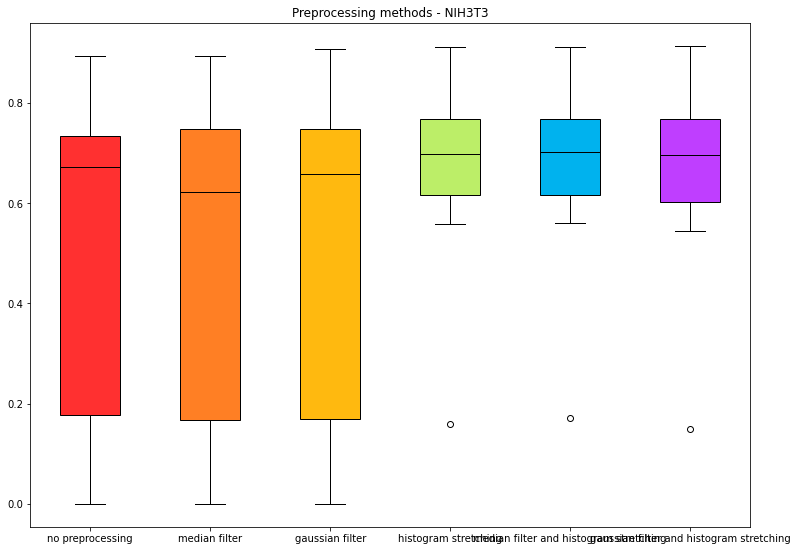

In [71]:
# Dice score - preprocessing - NIH3T3-dataset - boxplot

data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_gaussian_filter_histogram_stretching]

fig_1 = plt.figure(figsize = (10 , 7))
ax = fig_1.add_axes([0 , 0 , 1 , 1])
ax.set_xticklabels(['no preprocessing' , 'median filter' , 'gaussian filter' , 'histogram stretching' , 'median filter and histogram stretching' , 'gaussian filter and histogram stretching'])
plt.title("Preprocessing methods - NIH3T3")
bp = ax.boxplot(data_NIH3T3, patch_artist = True)

colors = ['#FF3030', '#FF7F24','#FFB90F', '#BCEE68' , '#00B2EE' , '#BF3EFF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color ='black',linewidth = 1)

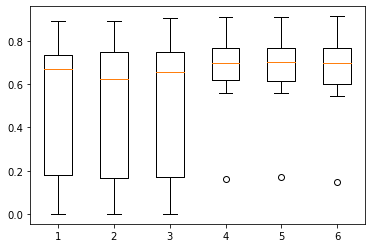

In [72]:
data_NIH3T3 = [NIH3T3_no_preprocessing , NIH3T3_median_filter , NIH3T3_gaussian_filter , NIH3T3_histogram_stretching , NIH3T3_median_filter_histogram_stretching , NIH3T3_gaussian_filter_histogram_stretching]

boxplot_NIH3T3 = plt.boxplot(data_NIH3T3)